# 2021/12/13
# 本代码干这几件事：计算孙伟皓定义的越赤道气流指数
# 计算相关性 计算4月的

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [10]:
path  =  "/home/sun/qomo-data/"
lonslice1  =  slice(80,90)
lonslice2  =  slice(50,60)

f1  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice1,lat=slice(-5,5),lev=925)
f2  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice2,lat=slice(-5,5),lev=925)

index_89  =  np.average(np.average(f1.climate_v,axis=1),axis=1)
index_56  =  np.average(np.average(f2.climate_v,axis=1),axis=1)

with open("/home/sun/data/onsetdate.json",'r') as load_f:
    a = json.load(load_f)

year = np.array(list(a.keys()))    ;  year  =  year.astype(int)
day  = np.array(list(a.values()))  ;  day   =  day.astype(int)

import pandas as pd

data = pd.DataFrame({'BOBSM onset date':day,'index_56_march':index_56,'index_89_march':index_89})

print(data.corr())

import scipy.stats as stats
print(stats.pearsonr(data['BOBSM onset date'],data['index_56_march']))
print(stats.pearsonr(data['BOBSM onset date'],data['index_89_march']))

                  BOBSM onset date  index_56_march  index_89_march
BOBSM onset date          1.000000       -0.031900       -0.325733
index_56_march           -0.031900        1.000000        0.359208
index_89_march           -0.325733        0.359208        1.000000
(-0.031900324773689245, 0.8450740922853112)
(-0.3257329989837272, 0.040256710801316785)


In [12]:
path  =  "/home/sun/qomo-data/"
lonslice1  =  slice(80,90)
lonslice2  =  slice(50,60)

f1  =  xr.open_dataset(path+"april_wind_early-late-climate_year.nc").sel(lon=lonslice1,lat=slice(-5,5),lev=925)
f2  =  xr.open_dataset(path+"april_wind_early-late-climate_year.nc").sel(lon=lonslice2,lat=slice(-5,5),lev=925)

index_89  =  np.average(np.average(f1.climate_v,axis=1),axis=1)
index_56  =  np.average(np.average(f2.climate_v,axis=1),axis=1)

with open("/home/sun/data/onsetdate.json",'r') as load_f:
    a = json.load(load_f)

year = np.array(list(a.keys()))    ;  year  =  year.astype(int)
day  = np.array(list(a.values()))  ;  day   =  day.astype(int)

import pandas as pd

data = pd.DataFrame({'BOBSM onset date':day,'index_56_march':index_56,'index_89_march':index_89})

print(data.corr())

import scipy.stats as stats
print(stats.pearsonr(data['BOBSM onset date'],data['index_56_march']))
print(stats.pearsonr(data['BOBSM onset date'],data['index_89_march']))
print(stats.pearsonr(data['index_56_march'],data['index_89_march']))

                  BOBSM onset date  index_56_march  index_89_march
BOBSM onset date          1.000000       -0.518391       -0.625153
index_56_march           -0.518391        1.000000        0.454076
index_89_march           -0.625153        0.454076        1.000000
(-0.5183910432676961, 0.0006112009378898282)
(-0.6251533337899129, 1.61372225364207e-05)
(0.4540762641752269, 0.003249266006612787)


/tmp/ipykernel_219042/114174986.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a  =  np.zeros(40,dtype=int).astype(dtype=np.str) ; a[:]  =  'grey'


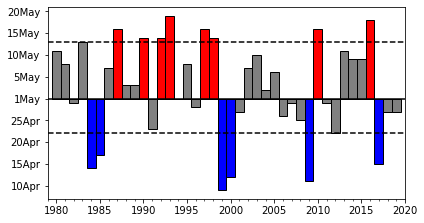

In [21]:
# 筛选 晚年用红色，早年用蓝色
a  =  np.zeros(40,dtype=int).astype(dtype=np.str) ; a[:]  =  'grey'
color_list  =  a.tolist()#  ;  color_list[:]  =  'grey'

for i in range(0,40):
    if day[i] < np.mean(day) - np.std(day):
        color_list[i]  =  'blue'
    if day[i] > np.mean(day) + np.std(day):
        color_list[i]  =  'red'
        
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# 设置y轴
y_label  =  ['10Apr','15Apr','20Apr','25Apr','1May','5May','10May','15May','20May']

fig,axs  =  plt.subplots(tight_layout=True)

# axs.set_yticks(np.arange(90, 160,10))

axs.bar(year,day-120,width=1,color=color_list,edgecolor='black')
# 刻度设置
axs.set_xlim(1979,2020)
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_minor_locator(MultipleLocator(1))

axs.set_yticks(np.arange(-20,25,5))
axs.set_yticklabels(y_label)

axs.plot([1979,2020],[0,0],color='black')
axs.plot([1979,2020],[np.ceil(np.mean(day)-np.std(day))-120,np.ceil(np.mean(day)-np.std(day))-120],color='k',linestyle='dashed')
axs.plot([1979,2020],[np.floor(np.mean(day)+np.std(day))-120,np.floor(np.mean(day)+np.std(day))-120],color='k',linestyle='dashed')

axs.set_aspect(0.5)

plt.savefig('/home/sun/paint/lunwen/bob_time_seris.pdf',dpi=2000)

plt.show()

In [62]:
path  =  "/home/sun/qomo-data/"
lonslice1  =  slice(80,90)
lonslice2  =  slice(50,60)

f1  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice1,lat=slice(-5,5),lev=925)
f2  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice2,lat=slice(-5,5),lev=925)

#获取时间
with open("/home/sun/qomo-data/early_date.json",'r') as load_f:
    a = json.load(load_f)
early_years = np.array(list(a.keys()))
early_days = np.array(list(a.values()))
early_years = early_years.astype(np.int)
early_days = early_days.astype(np.int)

with open("/home/sun/qomo-data/late_date.json",'r') as load_f:
    a = json.load(load_f)
late_years = np.array(list(a.keys()))
late_days = np.array(list(a.values()))
late_years = late_years.astype(np.int)
late_days = late_days.astype(np.int)

index_89  =  np.average(np.average(f1.early_v,axis=1),axis=1)
index_56  =  np.average(np.average(f2.early_v,axis=1),axis=1)


import pandas as pd

data = pd.DataFrame({'A':early_days,'B':index_56,'C':index_89})

data.corr()



/tmp/ipykernel_219042/3392926762.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  early_years = early_years.astype(np.int)
/tmp/ipykernel_219042/3392926762.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

,A,B,C
A,1.000000,0.379477,-0.341140
B,0.379477,1.000000,0.479475
C,-0.341140,0.479475,1.000000


In [63]:
import scipy.stats as stats
#stats.pearsonr(data['A'],data['B'])
stats.pearsonr(data['A'],data['C'])

(-0.3411395647658747, 0.4082564012437724)

In [56]:
data

,A,B,C
0,104,-1.744497,0.068533
1,107,-0.954506,0.483870
2,113,-1.399134,-0.044942
3,99,-2.713472,-0.328852
4,102,-2.938820,-0.890749
5,101,-2.874269,-1.398063
6,112,-3.052979,-0.999999
7,105,-2.572968,-0.208912


In [57]:
stats.pearsonr(data['A'],data['B'])

(0.3794768632903692, 0.3538370702796788)

In [58]:
stats.pearsonr(data['A'],data['C'])

(0.2265059623132933, 0.5896038390720396)

In [59]:
path  =  "/home/sun/qomo-data/"
lonslice1  =  slice(75,85)
lonslice2  =  slice(50,60)

f1  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice1,lat=slice(-5,5),lev=925)
f2  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice2,lat=slice(-5,5),lev=925)

#获取时间
with open("/home/sun/qomo-data/early_date.json",'r') as load_f:
    a = json.load(load_f)
early_years = np.array(list(a.keys()))
early_days = np.array(list(a.values()))
early_years = early_years.astype(np.int)
early_days = early_days.astype(np.int)

with open("/home/sun/qomo-data/late_date.json",'r') as load_f:
    a = json.load(load_f)
late_years = np.array(list(a.keys()))
late_days = np.array(list(a.values()))
late_years = late_years.astype(np.int)
late_days = late_days.astype(np.int)

index_89  =  np.average(np.average(f1.late_v,axis=1),axis=1)
index_56  =  np.average(np.average(f2.late_v,axis=1),axis=1)


import pandas as pd

data = pd.DataFrame({'A':late_days,'B':index_56,'C':index_89})

data.corr()



/tmp/ipykernel_219042/3805067791.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  early_years = early_years.astype(np.int)
/tmp/ipykernel_219042/3805067791.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

,A,B,C
A,1.000000,0.165531,0.134239
B,0.165531,1.000000,0.475425
C,0.134239,0.475425,1.000000


In [60]:
stats.pearsonr(data['A'],data['B'])

(0.16553089284116382, 0.6071590928618869)

In [61]:
stats.pearsonr(data['A'],data['C'])

(0.13423885901661353, 0.6774562540394589)